In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
pd.set_option("display.max_rows",250)
pd.set_option("display.max_columns",250)
#Classifiers
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF

In [3]:
dataset = pd.read_csv("sc2_dataset_lt_5mins.csv")

In [4]:
non_sparse_dataset = dataset.fillna(value=0.0)
non_sparse_dataset.head()

,_p1_win_game,game_length,p1_APM,p1_APM_wo_select,p1_Archon,p1_Armory,p1_Assimilator,p1_Auto_Turret,p1_Baneling_Nest,p1_Banshee,p1_Barracks,p1_Battlecruiser,p1_Building_Attack,p1_Bunker,p1_Carrier,p1_Colossus,p1_Command_Center,p1_Corruptor,p1_Creep_Tumor,p1_Cybernetics_Core,p1_Dark,p1_Dark_Shrine,p1_Drone,p1_Engineering_Bay,p1_Evolution_Chamber,p1_Extractor,p1_Factory,p1_Fleet_Beacon,p1_Forge,p1_Fusion_Core,p1_Gateway,p1_Ghost,p1_Ghost_Academy,p1_Hatchery,p1_Hellion,p1_High,p1_Hive,p1_Hydralisk,p1_Hydralisk_Den,p1_Immortal,p1_Infestation_Pit,p1_Infestor,p1_Lair,p1_Lair_Upgrade_Hatchery,p1_Marauder,p1_Marine,p1_Medivac,p1_Missile_Turret,p1_Mothership,p1_Mutalisk,p1_Nexus,p1_Nydus_Network,p1_Nydus_Worm,p1_Observer,p1_Orbital_Command_Upgrade_Command_Center,p1_Overlord,p1_Phoenix,p1_Photon_Cannon,p1_Planetary_Fortress_Upgrade_Command_Center,p1_Point_Defense,p1_Probe,p1_Protoss_Air_Armor_1,p1_Protoss_Air_Armor_2,p1_Protoss_Air_Armor_3,p1_Protoss_Air_Weapons_1,p1_Protoss_Air_Weapons_2,p1_Protoss_Air_Weapons_3,p1_Protoss_Ground_Armor_1,p1_Protoss_Ground_Armor_2,p1_Protoss_Ground_Armor_3,p1_Protoss_Ground_Weapons_1,p1_Protoss_Ground_Weapons_2,p1_Protoss_Ground_Weapons_3,p1_Protoss_Shield_1,p1_Protoss_Shield_2,p1_Protoss_Shield_3,p1_Pylon,p1_Queen,p1_Raven,p1_Reactor_Barracks,p1_Reactor_Factory,p1_Reactor_Starport,p1_Reaper,p1_Refinery,p1_Roach,p1_Roach_Warren,p1_Robotics_Bay,p1_Robotics_Facility,p1_SCV,p1_Sensor_Tower,p1_Sentry,p1_Siege,p1_Spawning_Pool,p1_Spine_Crawler,p1_Spire,p1_Spore_Crawler,p1_Stalker,p1_Stargate,p1_Starport,p1_Supply_Depot,p1_Tech_Lab,p1_Templar_Archives,p1_Terran_Building,p1_Terran_Building_Armor,p1_Terran_Hi-sec_Auto_Tracking,p1_Terran_Infantry_Armor_1,p1_Terran_Infantry_Armor_2,p1_Terran_Infantry_Armor_3,p1_Terran_Infantry_Weapons_1,p1_Terran_Infantry_Weapons_2,p1_Terran_Infantry_Weapons_3,p1_Terran_Neosteel_Frame,p1_Terran_Ship_Plating_1,p1_Terran_Ship_Plating_2,p1_Terran_Ship_Plating_3,p1_Terran_Ship_Weapons_1,p1_Terran_Ship_Weapons_2,p1_Terran_Ship_Weapons_3,p1_Terran_Vehicle_Plating_1,p1_Terran_Vehicle_Plating_2,p1_Terran_Vehicle_Plating_3,p1_Terran_Vehicle_Weapons_1,p1_Terran_Vehicle_Weapons_2,p1_Terran_Vehicle_Weapons_3,p1_Thor,...,p2_Infestation_Pit,p2_Infestor,p2_Lair,p2_Lair_Upgrade_Hatchery,p2_Marauder,p2_Marine,p2_Medivac,p2_Missile_Turret,p2_Mothership,p2_Mutalisk,p2_Nexus,p2_Nydus_Network,p2_Nydus_Worm,p2_Observer,p2_Orbital_Command_Upgrade_Command_Center,p2_Overlord,p2_Phoenix,p2_Photon_Cannon,p2_Planetary_Fortress_Upgrade_Command_Center,p2_Point_Defense,p2_Probe,p2_Protoss_Air_Armor_1,p2_Protoss_Air_Armor_2,p2_Protoss_Air_Armor_3,p2_Protoss_Air_Weapons_1,p2_Protoss_Air_Weapons_2,p2_Protoss_Air_Weapons_3,p2_Protoss_Ground_Armor_1,p2_Protoss_Ground_Armor_2,p2_Protoss_Ground_Armor_3,p2_Protoss_Ground_Weapons_1,p2_Protoss_Ground_Weapons_2,p2_Protoss_Ground_Weapons_3,p2_Protoss_Shield_1,p2_Protoss_Shield_2,p2_Protoss_Shield_3,p2_Pylon,p2_Queen,p2_Raven,p2_Reactor_Barracks,p2_Reactor_Factory,p2_Reactor_Starport,p2_Reaper,p2_Refinery,p2_Roach,p2_Roach_Warren,p2_Robotics_Bay,p2_Robotics_Facility,p2_SCV,p2_Sensor_Tower,p2_Sentry,p2_Siege,p2_Spawning_Pool,p2_Spine_Crawler,p2_Spire,p2_Spore_Crawler,p2_Stalker,p2_Stargate,p2_Starport,p2_Supply_Depot,p2_Tech_Lab,p2_Templar_Archives,p2_Terran_Building,p2_Terran_Building_Armor,p2_Terran_Hi-sec_Auto_Tracking,p2_Terran_Infantry_Armor_1,p2_Terran_Infantry_Armor_2,p2_Terran_Infantry_Armor_3,p2_Terran_Infantry_Weapons_1,p2_Terran_Infantry_Weapons_2,p2_Terran_Infantry_Weapons_3,p2_Terran_Neosteel_Frame,p2_Terran_Ship_Plating_1,p2_Terran_Ship_Plating_2,p2_Terran_Ship_Plating_3,p2_Terran_Ship_Weapons_1,p2_Terran_Ship_Weapons_2,p2_Terran_Ship_Weapons_3,p2_Terran_Vehicle_Plating_1,p2_Terran_Vehicle_Plating_2,p2_Terran_Vehicle_Plating_3,p2_Terran_Vehicle_Weapons_1,p2_Terran_Vehicle_Weapons_2,p2_Terran_Vehicle_Weapons_3,p2_Thor,p2_Twilight_Council,p2_Ultralisk,p2_Ultralisk_Cavern,p2_Viking,p2_Void,p2_Warp,p2_Zealot,p2_Zerg_Flyer_Attacks_1,p2_Zerg_Flyer_Attacks_2,p2_Zerg_

# Extract the target variable

In [5]:
y = non_sparse_dataset._p1_win_game.as_matrix()

In [6]:
X = non_sparse_dataset.iloc[:,1:].as_matrix()

In [7]:
features = non_sparse_dataset.iloc[:,2:].columns
features

Index([u'p1_APM', u'p1_APM_wo_select', u'p1_Archon', u'p1_Armory',
       u'p1_Assimilator', u'p1_Auto_Turret', u'p1_Baneling_Nest',
       u'p1_Banshee', u'p1_Barracks', u'p1_Battlecruiser',
       ...
       u'p2_min_distance_from_opponent', u'p2_nb_scooting',
       u'p2_selected_hotkeys', u'p2_spent_gas', u'p2_spent_minerals',
       u'p2_timing_1st_scooting', u'p2_to_Orbital_Command_Command_Center',
       u'p2_to_Planetary_Fortress_Command_Center', u'p2_to_Warp_Gate_Gateway',
       u'p2_unit_types'],
      dtype='object', length=326)

# Split the train and test dataset

In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
len(X_train)

24173

# Standardizing

In [10]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Cross-validation protocol

In [11]:
from sklearn.cross_validation import KFold

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=3,shuffle=True)
    y_pred = y.copy()
    
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [12]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import average_precision_score

def accuracy(y_true,y_pred):
    # NumPy interpretes True and False as 1. and 0.
    return np.mean(y_true == y_pred)



# Preparing a sample experiment

In [13]:
small_train_index = round(len(X_train)/10)
small_train_index

2417.0

In [14]:
y = y_train[:small_train_index]
X = X_train_std[:small_train_index,:]
print("X length = %d and y length = %d" % (len(X), len(y)))

X length = 2417 and y length = 2417


C:\Users\Michael\Anaconda\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
C:\Users\Michael\Anaconda\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [15]:
print "Logistic Regression:"
print "%.3f" % accuracy(y, run_cv(X,y,LR))
print "Gradient Boosting Classifier"
print "%.3f" % accuracy(y, run_cv(X,y,GBC))
print "Support vector machines:"
print "%.3f" % accuracy(y, run_cv(X,y,SVC))
print "Random forest:"
print "%.3f" % accuracy(y, run_cv(X,y,RF))
print "K-nearest-neighbors:"
print "%.3f" % accuracy(y, run_cv(X,y,KNN))

Logistic Regression:
0.701
Gradient Boosting Classifier
0.684
Support vector machines:
0.709
Random forest:
0.628
K-nearest-neighbors:
0.604


# Feature selection

In [17]:
from sklearn import svm
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
f =[]
s =[]
svc = svm.SVC(kernel='linear')
svc.C = 0.01
for features_nb in range(X_sample_train.shape[1],1, -1):
    f.append(features_nb)
    X_new = SelectKBest(k=features_nb).fit_transform(X_sample_train, y_sample_train)
    this_scores = cross_val_score(svc, X_new, y_sample_train, n_jobs=8)
    s.append(np.mean(this_scores))

C:\Users\Michael\Anaconda\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Users\Michael\Anaconda\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Users\Michael\Anaconda\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.ui

In [18]:
print("The best number of features = %d" % f[s.index(max(s))])

The best number of features = 182


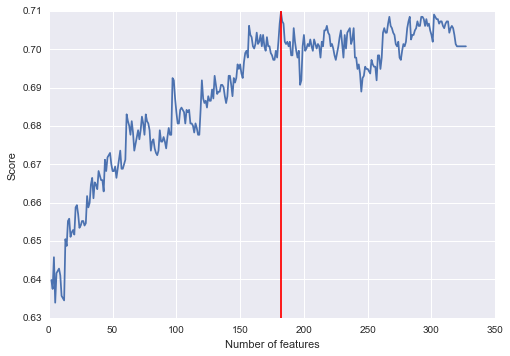

In [19]:
#inverted list of number of features
plt.plot(f,s)
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.axvline(f[s.index(max(s))],color='r')
plt.show()

In [22]:
sk = SelectKBest(k=182)
X_new_train = sk.fit_transform(X_sample_train, y_sample_train)
X_new_test = sk.transform(X_sample_test)

In [23]:
ix = sk.get_support(indices=True)
ix

array([  4,   5,   7,   8,   9,  11,  14,  15,  16,  18,  19,  20,  21,
        22,  23,  25,  27,  29,  32,  33,  34,  38,  40,  41,  42,  44,
        45,  46,  49,  51,  52,  58,  59,  60,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  78,  82,  84,  85,  86,  87,  89,
        90,  91,  92,  95,  98,  99, 100, 105, 106, 107, 108, 109, 117,
       118, 120, 121, 122, 123, 124, 125, 126, 130, 131, 132, 133, 134,
       139, 141, 142, 145, 148, 149, 150, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 165, 168, 173, 175, 176, 177, 181, 183,
       185, 188, 189, 190, 192, 196, 198, 201, 204, 207, 209, 212, 213,
       215, 216, 219, 220, 222, 223, 224, 226, 227, 229, 230, 231, 232,
       233, 234, 235, 238, 240, 248, 249, 250, 251, 255, 257, 258, 259,
       260, 262, 263, 267, 270, 275, 277, 280, 281, 282, 284, 285, 287,
       289, 291, 293, 294, 295, 296, 297, 298, 299, 304, 305, 307, 308,
       310, 311, 312, 313, 314, 316, 317, 318, 319, 320, 321, 32

In [41]:
list(features[ix])

['p1_Assimilator',
 'p1_Auto_Turret',
 'p1_Banshee',
 'p1_Barracks',
 'p1_Battlecruiser',
 'p1_Bunker',
 'p1_Command_Center',
 'p1_Corruptor',
 'p1_Creep_Tumor',
 'p1_Dark',
 'p1_Dark_Shrine',
 'p1_Drone',
 'p1_Engineering_Bay',
 'p1_Evolution_Chamber',
 'p1_Extractor',
 'p1_Fleet_Beacon',
 'p1_Fusion_Core',
 'p1_Ghost',
 'p1_Hellion',
 'p1_High',
 'p1_Hive',
 'p1_Infestation_Pit',
 'p1_Lair',
 'p1_Lair_Upgrade_Hatchery',
 'p1_Marauder',
 'p1_Medivac',
 'p1_Missile_Turret',
 'p1_Mothership',
 'p1_Nydus_Network',
 'p1_Observer',
 'p1_Orbital_Command_Upgrade_Command_Center',
 'p1_Probe',
 'p1_Protoss_Air_Armor_1',
 'p1_Protoss_Air_Armor_2',
 'p1_Protoss_Ground_Armor_2',
 'p1_Protoss_Ground_Armor_3',
 'p1_Protoss_Ground_Weapons_1',
 'p1_Protoss_Ground_Weapons_2',
 'p1_Protoss_Ground_Weapons_3',
 'p1_Protoss_Shield_1',
 'p1_Protoss_Shield_2',
 'p1_Protoss_Shield_3',
 'p1_Pylon',
 'p1_Queen',
 'p1_Raven',
 'p1_Reactor_Factory',
 'p1_Roach',
 'p1_Robotics_Bay',
 'p1_Robotics_Facility',
 'p1_

# Feature importance

Feature ranking:
1. p1_APM (0.004786)
2. p1_APM_wo_select (0.004422)
3. p1_Archon (0.003624)
4. p1_Armory (0.002744)
5. p1_Assimilator (0.002731)
6. p1_Auto_Turret (0.002532)
7. p1_Baneling_Nest (0.001765)
8. p1_Banshee (0.001665)
9. p1_Barracks (0.001303)
10. p1_Battlecruiser (0.000000)


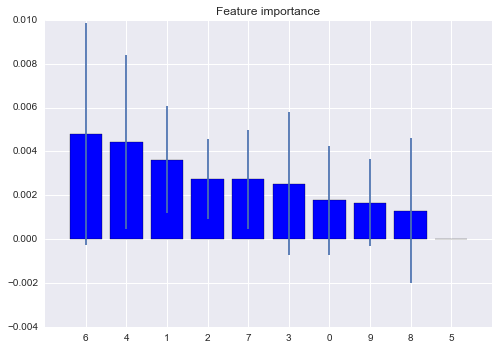

In [42]:
forest = RF()
forest_fit = forest.fit(X_new_train, y_sample_train)
forest_prediction = forest_fit.predict(X_new_test)

importances = forest_fit.feature_importances_[:10]
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

#Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. %s (%f)" % (f+1, features[f], importances[indices[f]]))
    
#plot the feature importances of the forest
plt.figure()
plt.title("Feature importance")
plt.bar(range(10), importances[indices], yerr=std[indices], color="b", align="center")
plt.xticks(range(10), indices)
plt.xlim([-1,10])
plt.show()

# Optimizing

In [25]:
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-3, -1, 50)

scores = list()
scores_std = list()

for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X_new_train, y_sample_train, n_jobs=4)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))
    


C:\Users\Michael\Anaconda\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Users\Michael\Anaconda\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Users\Michael\Anaconda\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.ui

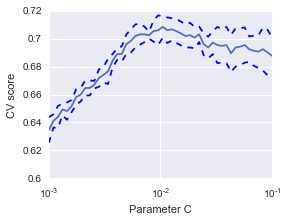

In [26]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')

plt.show()

In [27]:
max(scores)

0.70846969196833232

## Feature engeneering

In [51]:
non_sparse_dataset.iloc[:,2:].head()

,p1_APM,p1_APM_wo_select,p1_Archon,p1_Armory,p1_Assimilator,p1_Auto_Turret,p1_Baneling_Nest,p1_Banshee,p1_Barracks,p1_Battlecruiser,p1_Building_Attack,p1_Bunker,p1_Carrier,p1_Colossus,p1_Command_Center,p1_Corruptor,p1_Creep_Tumor,p1_Cybernetics_Core,p1_Dark,p1_Dark_Shrine,p1_Drone,p1_Engineering_Bay,p1_Evolution_Chamber,p1_Extractor,p1_Factory,p1_Fleet_Beacon,p1_Forge,p1_Fusion_Core,p1_Gateway,p1_Ghost,p1_Ghost_Academy,p1_Hatchery,p1_Hellion,p1_High,p1_Hive,p1_Hydralisk,p1_Hydralisk_Den,p1_Immortal,p1_Infestation_Pit,p1_Infestor,p1_Lair,p1_Lair_Upgrade_Hatchery,p1_Marauder,p1_Marine,p1_Medivac,p1_Missile_Turret,p1_Mothership,p1_Mutalisk,p1_Nexus,p1_Nydus_Network,p1_Nydus_Worm,p1_Observer,p1_Orbital_Command_Upgrade_Command_Center,p1_Overlord,p1_Phoenix,p1_Photon_Cannon,p1_Planetary_Fortress_Upgrade_Command_Center,p1_Point_Defense,p1_Probe,p1_Protoss_Air_Armor_1,p1_Protoss_Air_Armor_2,p1_Protoss_Air_Armor_3,p1_Protoss_Air_Weapons_1,p1_Protoss_Air_Weapons_2,p1_Protoss_Air_Weapons_3,p1_Protoss_Ground_Armor_1,p1_Protoss_Ground_Armor_2,p1_Protoss_Ground_Armor_3,p1_Protoss_Ground_Weapons_1,p1_Protoss_Ground_Weapons_2,p1_Protoss_Ground_Weapons_3,p1_Protoss_Shield_1,p1_Protoss_Shield_2,p1_Protoss_Shield_3,p1_Pylon,p1_Queen,p1_Raven,p1_Reactor_Barracks,p1_Reactor_Factory,p1_Reactor_Starport,p1_Reaper,p1_Refinery,p1_Roach,p1_Roach_Warren,p1_Robotics_Bay,p1_Robotics_Facility,p1_SCV,p1_Sensor_Tower,p1_Sentry,p1_Siege,p1_Spawning_Pool,p1_Spine_Crawler,p1_Spire,p1_Spore_Crawler,p1_Stalker,p1_Stargate,p1_Starport,p1_Supply_Depot,p1_Tech_Lab,p1_Templar_Archives,p1_Terran_Building,p1_Terran_Building_Armor,p1_Terran_Hi-sec_Auto_Tracking,p1_Terran_Infantry_Armor_1,p1_Terran_Infantry_Armor_2,p1_Terran_Infantry_Armor_3,p1_Terran_Infantry_Weapons_1,p1_Terran_Infantry_Weapons_2,p1_Terran_Infantry_Weapons_3,p1_Terran_Neosteel_Frame,p1_Terran_Ship_Plating_1,p1_Terran_Ship_Plating_2,p1_Terran_Ship_Plating_3,p1_Terran_Ship_Weapons_1,p1_Terran_Ship_Weapons_2,p1_Terran_Ship_Weapons_3,p1_Terran_Vehicle_Plating_1,p1_Terran_Vehicle_Plating_2,p1_Terran_Vehicle_Plating_3,p1_Terran_Vehicle_Weapons_1,p1_Terran_Vehicle_Weapons_2,p1_Terran_Vehicle_Weapons_3,p1_Thor,p1_Twilight_Council,p1_Ultralisk,...,p2_Infestation_Pit,p2_Infestor,p2_Lair,p2_Lair_Upgrade_Hatchery,p2_Marauder,p2_Marine,p2_Medivac,p2_Missile_Turret,p2_Mothership,p2_Mutalisk,p2_Nexus,p2_Nydus_Network,p2_Nydus_Worm,p2_Observer,p2_Orbital_Command_Upgrade_Command_Center,p2_Overlord,p2_Phoenix,p2_Photon_Cannon,p2_Planetary_Fortress_Upgrade_Command_Center,p2_Point_Defense,p2_Probe,p2_Protoss_Air_Armor_1,p2_Protoss_Air_Armor_2,p2_Protoss_Air_Armor_3,p2_Protoss_Air_Weapons_1,p2_Protoss_Air_Weapons_2,p2_Protoss_Air_Weapons_3,p2_Protoss_Ground_Armor_1,p2_Protoss_Ground_Armor_2,p2_Protoss_Ground_Armor_3,p2_Protoss_Ground_Weapons_1,p2_Protoss_Ground_Weapons_2,p2_Protoss_Ground_Weapons_3,p2_Protoss_Shield_1,p2_Protoss_Shield_2,p2_Protoss_Shield_3,p2_Pylon,p2_Queen,p2_Raven,p2_Reactor_Barracks,p2_Reactor_Factory,p2_Reactor_Starport,p2_Reaper,p2_Refinery,p2_Roach,p2_Roach_Warren,p2_Robotics_Bay,p2_Robotics_Facility,p2_SCV,p2_Sensor_Tower,p2_Sentry,p2_Siege,p2_Spawning_Pool,p2_Spine_Crawler,p2_Spire,p2_Spore_Crawler,p2_Stalker,p2_Stargate,p2_Starport,p2_Supply_Depot,p2_Tech_Lab,p2_Templar_Archives,p2_Terran_Building,p2_Terran_Building_Armor,p2_Terran_Hi-sec_Auto_Tracking,p2_Terran_Infantry_Armor_1,p2_Terran_Infantry_Armor_2,p2_Terran_Infantry_Armor_3,p2_Terran_Infantry_Weapons_1,p2_Terran_Infantry_Weapons_2,p2_Terran_Infantry_Weapons_3,p2_Terran_Neosteel_Frame,p2_Terran_Ship_Plating_1,p2_Terran_Ship_Plating_2,p2_Terran_Ship_Plating_3,p2_Terran_Ship_Weapons_1,p2_Terran_Ship_Weapons_2,p2_Terran_Ship_Weapons_3,p2_Terran_Vehicle_Plating_1,p2_Terran_Vehicle_Plating_2,p2_Terran_Vehicle_Plating_3,p2_Terran_Vehicle_Weapons_1,p2_Terran_Vehicle_Weapons_2,p2_Terran_Vehicle_Weapons_3,p2_Thor,p2_Twilight_Council,p2_Ultralisk,p2_Ultralisk_Cavern,p2_Viking,p2_Void,p2_Warp,p2_Zealot,p2_Zerg_Flyer_Attacks_1,p2_Zerg_Flyer_Attacks_2,

In [91]:
df = non_sparse_dataset.iloc[:,2:]

In [92]:
colnames = df.columns.values

In [93]:
colnames=list(set([n[2:]+'$' for n in colnames]))

In [94]:
colnames.sort()

In [95]:
select_df = pd.DataFrame()
for name in colnames:
    filt_df = df.filter(regex=name)
    select_df[name[:-1]] = filt_df.iloc[:,0]-filt_df.iloc[:,1]
select_df

,_APM,_APM_wo_select,_Archon,_Armory,_Assimilator,_Auto_Turret,_Baneling_Nest,_Banshee,_Barracks,_Battlecruiser,_Building_Attack,_Bunker,_Carrier,_Colossus,_Command_Center,_Corruptor,_Creep_Tumor,_Cybernetics_Core,_Dark,_Dark_Shrine,_Drone,_Engineering_Bay,_Evolution_Chamber,_Extractor,_Factory,_Fleet_Beacon,_Forge,_Fusion_Core,_Gateway,_Ghost,_Ghost_Academy,_Hatchery,_Hellion,_High,_Hive,_Hydralisk,_Hydralisk_Den,_Immortal,_Infestation_Pit,_Infestor,_Lair,_Lair_Upgrade_Hatchery,_Marauder,_Marine,_Medivac,_Missile_Turret,_Mothership,_Mutalisk,_Nexus,_Nydus_Network,_Nydus_Worm,_Observer,_Orbital_Command_Upgrade_Command_Center,_Overlord,_Phoenix,_Photon_Cannon,_Planetary_Fortress_Upgrade_Command_Center,_Point_Defense,_Probe,_Protoss_Air_Armor_1,_Protoss_Air_Armor_2,_Protoss_Air_Armor_3,_Protoss_Air_Weapons_1,_Protoss_Air_Weapons_2,_Protoss_Air_Weapons_3,_Protoss_Ground_Armor_1,_Protoss_Ground_Armor_2,_Protoss_Ground_Armor_3,_Protoss_Ground_Weapons_1,_Protoss_Ground_Weapons_2,_Protoss_Ground_Weapons_3,_Protoss_Shield_1,_Protoss_Shield_2,_Protoss_Shield_3,_Pylon,_Queen,_Raven,_Reactor_Barracks,_Reactor_Factory,_Reactor_Starport,_Reaper,_Refinery,_Roach,_Roach_Warren,_Robotics_Bay,_Robotics_Facility,_SCV,_Sensor_Tower,_Sentry,_Siege,_Spawning_Pool,_Spine_Crawler,_Spire,_Spore_Crawler,_Stalker,_Stargate,_Starport,_Supply_Depot,_Tech_Lab,_Templar_Archives,_Terran_Building,_Terran_Building_Armor,_Terran_Hi-sec_Auto_Tracking,_Terran_Infantry_Armor_1,_Terran_Infantry_Armor_2,_Terran_Infantry_Armor_3,_Terran_Infantry_Weapons_1,_Terran_Infantry_Weapons_2,_Terran_Infantry_Weapons_3,_Terran_Neosteel_Frame,_Terran_Ship_Plating_1,_Terran_Ship_Plating_2,_Terran_Ship_Plating_3,_Terran_Ship_Weapons_1,_Terran_Ship_Weapons_2,_Terran_Ship_Weapons_3,_Terran_Vehicle_Plating_1,_Terran_Vehicle_Plating_2,_Terran_Vehicle_Plating_3,_Terran_Vehicle_Weapons_1,_Terran_Vehicle_Weapons_2,_Terran_Vehicle_Weapons_3,_Thor,_Twilight_Council,_Ultralisk,_Ultralisk_Cavern,_Viking,_Void,_Warp,_Zealot,_Zerg_Flyer_Attacks_1,_Zerg_Flyer_Attacks_2,_Zerg_Flyer_Attacks_3,_Zerg_Flyer_Carapace_1,_Zerg_Flyer_Carapace_2,_Zerg_Flyer_Carapace_3,_Zerg_Ground_Carapace_1,_Zerg_Ground_Carapace_2,_Zerg_Ground_Carapace_3,_Zerg_Melee_Attacks_1,_Zerg_Melee_Attacks_2,_Zerg_Melee_Attacks_3,_Zerg_Missile_Attacks_1,_Zerg_Missile_Attacks_2,_Zerg_Missile_Attacks_3,_Zergling,_an,_assigned_hotkeys,_building_types,_collected_gas,_collected_minerals,_max_distance_from_opponent,_mean_distance_from_opponent,_min_distance_from_opponent,_nb_scooting,_selected_hotkeys,_spent_gas,_spent_minerals,_timing_1st_scooting,_to_Orbital_Command_Command_Center,_to_Planetary_Fortress_Command_Center,_to_Warp_Gate_Gateway,_unit_types
0,-52.514968,-24.194918,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.0,0.0,-21,1,-98.407317,3178.767457,8.921409,13.573083,2.755987,-25,-396,1025,2725,-41.638376,0.0,0.0,0.0,0
1,47.431682,13.239911,0.0,-2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,127.0,-2.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,5.0,-6.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,2.0,0.0,-12.0,-119.0,-4.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,-4.0,0.0,-2.0,0.0,-6.0,9.0,1.0,0.0,0.0,-72.0,0.0,0.0,-19.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-20.0,-9.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,

In [100]:
stdsc = StandardScaler()
scaled_mat = stdsc.fit_transform(select_df)

In [105]:
scaled_df = pd.DataFrame(scaled_mat, columns=select_df.columns.values)

In [107]:
scaled_df.describe()

,_APM,_APM_wo_select,_Archon,_Armory,_Assimilator,_Auto_Turret,_Baneling_Nest,_Banshee,_Barracks,_Battlecruiser,_Building_Attack,_Bunker,_Carrier,_Colossus,_Command_Center,_Corruptor,_Creep_Tumor,_Cybernetics_Core,_Dark,_Dark_Shrine,_Drone,_Engineering_Bay,_Evolution_Chamber,_Extractor,_Factory,_Fleet_Beacon,_Forge,_Fusion_Core,_Gateway,_Ghost,_Ghost_Academy,_Hatchery,_Hellion,_High,_Hive,_Hydralisk,_Hydralisk_Den,_Immortal,_Infestation_Pit,_Infestor,_Lair,_Lair_Upgrade_Hatchery,_Marauder,_Marine,_Medivac,_Missile_Turret,_Mothership,_Mutalisk,_Nexus,_Nydus_Network,_Nydus_Worm,_Observer,_Orbital_Command_Upgrade_Command_Center,_Overlord,_Phoenix,_Photon_Cannon,_Planetary_Fortress_Upgrade_Command_Center,_Point_Defense,_Probe,_Protoss_Air_Armor_1,_Protoss_Air_Armor_2,_Protoss_Air_Armor_3,_Protoss_Air_Weapons_1,_Protoss_Air_Weapons_2,_Protoss_Air_Weapons_3,_Protoss_Ground_Armor_1,_Protoss_Ground_Armor_2,_Protoss_Ground_Armor_3,_Protoss_Ground_Weapons_1,_Protoss_Ground_Weapons_2,_Protoss_Ground_Weapons_3,_Protoss_Shield_1,_Protoss_Shield_2,_Protoss_Shield_3,_Pylon,_Queen,_Raven,_Reactor_Barracks,_Reactor_Factory,_Reactor_Starport,_Reaper,_Refinery,_Roach,_Roach_Warren,_Robotics_Bay,_Robotics_Facility,_SCV,_Sensor_Tower,_Sentry,_Siege,_Spawning_Pool,_Spine_Crawler,_Spire,_Spore_Crawler,_Stalker,_Stargate,_Starport,_Supply_Depot,_Tech_Lab,_Templar_Archives,_Terran_Building,_Terran_Building_Armor,_Terran_Hi-sec_Auto_Tracking,_Terran_Infantry_Armor_1,_Terran_Infantry_Armor_2,_Terran_Infantry_Armor_3,_Terran_Infantry_Weapons_1,_Terran_Infantry_Weapons_2,_Terran_Infantry_Weapons_3,_Terran_Neosteel_Frame,_Terran_Ship_Plating_1,_Terran_Ship_Plating_2,_Terran_Ship_Plating_3,_Terran_Ship_Weapons_1,_Terran_Ship_Weapons_2,_Terran_Ship_Weapons_3,_Terran_Vehicle_Plating_1,_Terran_Vehicle_Plating_2,_Terran_Vehicle_Plating_3,_Terran_Vehicle_Weapons_1,_Terran_Vehicle_Weapons_2,_Terran_Vehicle_Weapons_3,_Thor,_Twilight_Council,_Ultralisk,_Ultralisk_Cavern,_Viking,_Void,_Warp,_Zealot,_Zerg_Flyer_Attacks_1,_Zerg_Flyer_Attacks_2,_Zerg_Flyer_Attacks_3,_Zerg_Flyer_Carapace_1,_Zerg_Flyer_Carapace_2,_Zerg_Flyer_Carapace_3,_Zerg_Ground_Carapace_1,_Zerg_Ground_Carapace_2,_Zerg_Ground_Carapace_3,_Zerg_Melee_Attacks_1,_Zerg_Melee_Attacks_2,_Zerg_Melee_Attacks_3,_Zerg_Missile_Attacks_1,_Zerg_Missile_Attacks_2,_Zerg_Missile_Attacks_3,_Zergling,_an,_assigned_hotkeys,_building_types,_collected_gas,_collected_minerals,_max_distance_from_opponent,_mean_distance_from_opponent,_min_distance_from_opponent,_nb_scooting,_selected_hotkeys,_spent_gas,_spent_minerals,_timing_1st_scooting,_to_Orbital_Command_Command_Center,_to_Planetary_Fortress_Command_Center,_to_Warp_Gate_Gateway,_unit_types
count,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3

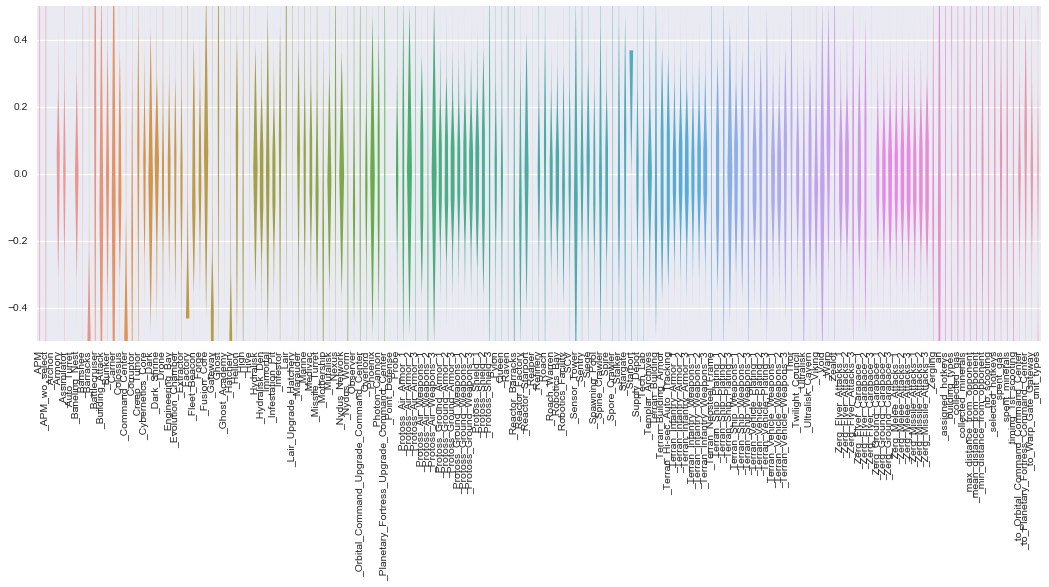

In [129]:
plt.figure(figsize=(18, 6))
g = sns.violinplot(data=scaled_df, cut=0, inner=None, linewidth=0)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylim(-.5,.5)
plt.show()

In [130]:
inter_quantile_range = scaled_df.quantile(q=.75) - scaled_df.quantile(q=.25)

In [135]:
inter_quantile_range.sort_values(inplace=True, ascending=False)


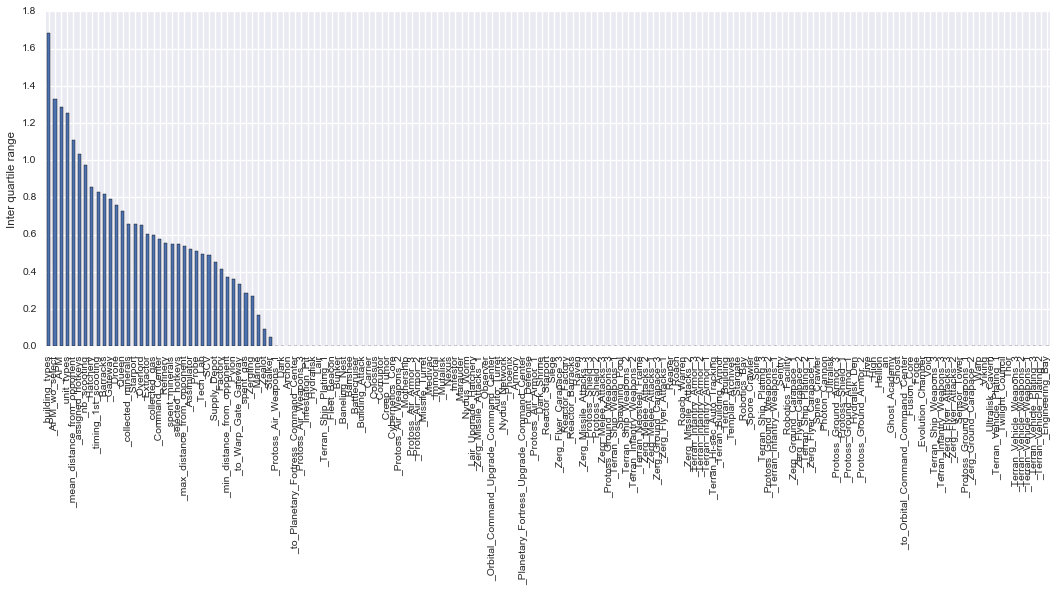

In [138]:
plt.figure(figsize=(18, 6))
inter_quantile_range.plot.bar()
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel("Inter quartile range")
plt.show()

In [150]:
selected_cols = inter_quantile_range.ix[inter_quantile_range > 0.05].index.values
inter_quantile_range.ix[inter_quantile_range > 0.05]

_building_types                 1.682335
_APM_wo_select                  1.328709
_APM                            1.287118
_unit_types                     1.255877
_mean_distance_from_opponent    1.107298
_assigned_hotkeys               1.033044
_nb_scooting                    0.973151
_Hatchery                       0.856653
_timing_1st_scooting            0.827457
_Barracks                       0.815745
_Gateway                        0.793692
_Drone                          0.757077
_Queen                          0.725377
_collected_minerals             0.659139
_Starport                       0.658750
_Overlord                       0.651438
_Extractor                      0.605350
_collected_gas                  0.596251
_Command_Center                 0.575615
_Refinery                       0.555060
_spent_minerals                 0.550759
_selected_hotkeys               0.549403
_max_distance_from_opponent     0.539848
_Assimilator                    0.522202
_Probe          

In [153]:
selected_cols_wo_APM = np.delete(selected_cols,[1])

In [154]:
scaled_df[selected_cols_wo_APM]

,_building_types,_APM,_unit_types,_mean_distance_from_opponent,_assigned_hotkeys,_nb_scooting,_Hatchery,_timing_1st_scooting,_Barracks,_Gateway,_Drone,_Queen,_collected_minerals,_Starport,_Overlord,_Extractor,_collected_gas,_Command_Center,_Refinery,_spent_minerals,_selected_hotkeys,_max_distance_from_opponent,_Assimilator,_Probe,_Tech_Lab,_SCV,_Supply_Depot,_Factory,_min_distance_from_opponent,_Pylon,_to_Warp_Gate_Gateway,_spent_gas,_Zergling,_Marine,_Zealot,_Stalker
0,0.423799,-0.635114,0.014510,0.665350,-0.989986,-0.277621,-0.127739,-0.280330,-0.517529,-0.483044,0.146158,-0.741285,0.243117,0.368728,-0.077470,0.181578,-0.043425,-0.469056,0.004275,0.193832,-0.850767,0.551353,0.006253,0.005487,0.008737,0.006949,0.009217,-0.432071,0.183130,0.006680,0.010445,0.115029,-0.062560,0.010750,0.014432,0.025240
1,-0.837952,0.570615,-0.613428,-0.071180,0.418711,-0.100684,1.585567,-0.326200,-0.517529,-0.483044,2.071768,1.193055,0.531898,0.368728,1.876845,1.594061,0.151059,-0.469056,-1.660905,-0.463885,-0.377729,-0.187056,0.006253,0.005487,-2.218813,-1.754469,-1.805423,-0.432071,0.240676,0.006680,0.010445,-0.208815,1.952977,-1.645258,0.014432,0.025240
2,2.106134,-1.875468,0.642449,0.571021,-0.050855,-1.295006,-0.127739,-2.099408,-0.517529,-0.483044,0.541155,-0.015908,0.210391,0.368728,0.218639,0.383361,-0.152251,-0.469056,0.004275,-0.107888,-0.006511,0.121921,-0.777050,-0.740499,0.008737,0.006949,0.009217,-0.432071,0.172301,-0.645593,-0.326050,0.003023,0.049415,0.010750,-0.313492,-1.008933
3,0.423799,1.650061,2.526264,-1.761030,0.043058,0.264248,-0.556065,0.781603,-0.517529,-0.086197,-0.018424,-0.015908,-0.154457,0.368728,-0.018248,-0.020205,0.465143,-0.469056,0.004275,-0.150991,-0.171968,-0.131603,0.528454,0.798098,0.008737,-1.167330,-1.079567,-0.432071,-7.219366,0.586478,0.683436,0.222166,-0.017770,-0.865960,0.061278,1.162831
4,0.844383,-0.382045,1.270387,-2.166649,-0.003898,0.684472,0.300588,-3.155608,-0.517529,-0.483044,0.820944,1.676639,-0.293483,0.368728,0.810855,1.190494,-0.374660,-0.469056,0.004275,-0.044032,0.018944,0.007768,-1.560353,-1.066868,0.008737,0.006949,0.009217,-0.432071,0.093382,-0.718068,0.010445,-0.104114,0.049415,0.010750,-0.500877,-0.491846
5,0.844383,0.558521,-0.613428,-0.375005,1.827407,0.596004,2.870546,0.931885,-0.517529,-0.483044,1.462814,1.676639,0.781059,0.368728,1.699180,1.997627,2.073101,-0.469056,-1.105845,-0.535724,0.322283,-0.342257,0.006253,0.005487,-0.733780,-1.534292,-1.442495,-0.432071,-0.285908,0.006680,0.010445,0.563054,1.818608,-2.730709,0.014432,0.025240
6,-1.258536,0.917318,-1.241367,0.629133,-1.600421,-0.277621,2.013894,-0.460186,-0.517529,-0.483044,0.853861,1.918432,-2.013902,0.368728,1.699180,2.401194,1.562584,-0.469056,-2.215965,-2.529630,-2.093818,0.046722,0.006253,0.005487,-2.218813,-1.974646,-2.077619,-0.432071,0.650039,0.006680,0.010445,-1.832907,0.385337,-3.148190,0.014432,0.025240
7,-1.679119,-0.248032,-1.241367,0.306171,0.982189,-0.841606,-0.556065,0.305408,-0.517529,0.707495,-0.018424,-0.015908,0.106014,0.368728,-0.018248,-0.020205,-2.362004,-0.469056,0.004275,-0.752834,0.150462,-0.283697,-1.038151,0.588289,0.008737,0.006949,0.009217,-0.432071,0.556492,0.369054,-0.662545,-0.783456,-0.017770,0.010750,-0.360338,-1.732854
8,0.003215,0.611377,0.642449,0.022595,0.136971,-0.631494,-0.556065,1.026943,-0.313593,-0.483044,-0.018424,-0.015908,0.119101,-0.290023,-0.018248,-0.020205,-0.349247,-0.469056,-0.550785,0.007053,0.004096,-0.159121,0.006253,0.005487,0.008737,0.080341,-0.172247,0.396697,0.138740,0.006680,0.010445,0.027372,-0.017770,0.219491,0.014432,0.025240
9,0.423799,-0.426035,2.526264,-1.172325,0.043058,1.137872,-0.556065,0.000619,-0.517529,1.501187,-1.417372,-1.950247,-0.627174,0.368728,-1.558011,-1.230905,0.217584,-0.469056,0.004275,0.139555,0.042278,0.213298,1.572858,1.357588,0.008737,0.006949,0.009217,-0.432071,-0.176574,1.528651,0.683436,0.280604,-0.017770,0.010750,0.061278,1.317957


In [158]:
X = scaled_df[selected_cols_wo_APM].as_matrix()
y = non_sparse_dataset._p1_win_game.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [159]:
len(X_train)

24173

In [160]:
print "Logistic Regression:"
print "%.3f" % accuracy(y, run_cv(X,y,LR))
print "Gradient Boosting Classifier"
print "%.3f" % accuracy(y, run_cv(X,y,GBC))
print "Support vector machines:"
print "%.3f" % accuracy(y, run_cv(X,y,SVC))
print "Random forest:"
print "%.3f" % accuracy(y, run_cv(X,y,RF))
print "K-nearest-neighbors:"
print "%.3f" % accuracy(y, run_cv(X,y,KNN))

Logistic Regression:
0.719
Gradient Boosting Classifier
0.710
Support vector machines:
0.733
Random forest:
0.674
K-nearest-neighbors:
0.651


In [162]:
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-3, -1, 50)

scores = list()
scores_std = list()

for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=4)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

C:\Users\Michael\Anaconda\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Users\Michael\Anaconda\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Users\Michael\Anaconda\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.ui

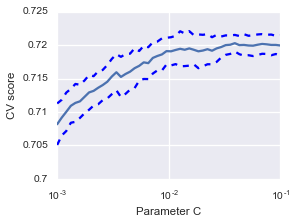

In [163]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')

plt.show()

In [164]:
max(scores)

0.72027572019367636